<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/Try_Jasoon_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':'1Bi2fJZw6Vhj7dyP7Ad6qtPsYf5LevEm4'})

In [6]:
#Importing all the libraries
import numpy as np
import numpy as geek 
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation 
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [7]:
downloaded.GetContentFile('Master_thesis_Data.csv')

In [8]:
import pandas as pd
df2 = pd.read_csv('Master_thesis_Data.csv') 
df2=df2.drop(columns=['Unnamed: 13', 'Unnamed: 14'])
#Cleaning the data, for mainly removing the NaN value
df2["Time"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2


,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,AutoHeading
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895,0.000980,-0.000342,0.0110,0.0646
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925,0.000990,-0.000342,0.0230,0.0643
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951,0.001010,-0.000342,0.0392,0.0641
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970,0.001040,-0.000342,0.0595,0.0632


In [9]:
t=df2['Time']
Tdata=df2['DVL1_S']
X1=np.array(Tdata)
Tdata2=df2['DVL2_S']
X2=np.array(Tdata2)
Tdata3=df2['DVL3_S']
X3=np.array(Tdata)
Tdata4=df2['DVL4_S']
X4=np.array(Tdata4)

In [10]:
Tdata1=df2['DVL1']
y1=np.array(Tdata1)
Tdata22=df2['DVL2']
y2=np.array(Tdata22)
Tdata33=df2['DVL3']
y3=np.array(Tdata33)
Tdata44=df2['DVL4']
y4=np.array(Tdata44)

In [11]:
Tdata5=df2['ROV6DOF']
X5=np.array(Tdata5)
Tdata6=df2['ROV6DOF.1']
X6=np.array(Tdata6)
Tdata7=df2['ROV6DOF.2']
X7=np.array(Tdata7)
Tdata8=df2['AutoHeading']
X8=np.array(Tdata8)

In [12]:
def split_sequence(sequence, n_steps):
	X1, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x1, seq_z = sequence[i:end_ix], sequence[end_ix]
		X1.append(seq_x1)
		z.append(seq_z)
	return array(X1), array(z)

In [13]:
# Working on the factor X1
X1

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [14]:
len(X1)

84991

In [15]:
X1.shape

(84991,)

In [16]:
scaled_data_For_Beam_One=X1

In [17]:
#Origanl data we have now
scaled_data_For_Beam_One

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [18]:
# define input sequence
raw_seq = X1
# choose a number of time steps
n_steps = 20
# split into samples
X1, z = split_sequence(raw_seq, n_steps)

In [19]:
X1.shape

(84971, 20)

In [20]:
X1.shape

(84971, 20)

X1, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [21]:
X1.shape

(84971, 20)

In [22]:
# I Just concluded that I need to try the working of the setup.
# Need to just stack the vector to see more and more.

In [23]:
#Working on the beam 2 
def split_sequence(sequence, n_steps):
	X2, z1 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x2, seq_z1 = sequence[i:end_ix], sequence[end_ix]
		X2.append(seq_x2)
		z1.append(seq_z1)
	return array(X2), array(z1)

In [24]:
X2

array([ 0. , 20. , 20. , ...,  1.8,  1.8,  1.8])

In [25]:
len(X2)

84991

In [26]:
X2.shape

(84991,)

In [27]:
scaled_data_For_Beam_Two=X2

In [28]:
# define input sequence
raw_seq = X2
# choose a number of time steps
n_steps = 20
# split into samples
X2, z1 = split_sequence(raw_seq, n_steps)

In [29]:
X2.shape

(84971, 20)

X2, z1 = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))

In [30]:
X2.shape

(84971, 20)

In [31]:
#Working on the beam 3
def split_sequence(sequence, n_steps):
	X3, z2 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x3, seq_z2 = sequence[i:end_ix], sequence[end_ix]
		X3.append(seq_x3)
		z2.append(seq_z2)
	return array(X3), array(z2)

In [32]:
X3

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [33]:
X3.shape

(84991,)

In [34]:
scaled_data_For_Beam_Three=X3

In [35]:
# define input sequence
raw_seq = X3
# choose a number of time steps
n_steps = 20
# split into samples
X3, z2 = split_sequence(raw_seq, n_steps)

In [36]:
X3.shape

(84971, 20)

X3, z2 = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X3 = X3.reshape((X3.shape[0], X3.shape[1], n_features))

In [37]:
#Working on the beam 3
def split_sequence(sequence, n_steps):
	X4, z3 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x4, seq_z3 = sequence[i:end_ix], sequence[end_ix]
		X4.append(seq_x4)
		z3.append(seq_z3)
	return array(X4), array(z3)

In [38]:
scaled_data_For_Beam_Four=X4

In [39]:
# define input sequence
raw_seq = X4
# choose a number of time steps
n_steps = 20
# split into samples
X4, z3 = split_sequence(raw_seq, n_steps)

In [40]:
X4.shape

(84971, 20)

X4, z3 = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X4 = X4.reshape((X4.shape[0], X4.shape[1], n_features))

In [41]:
X4.shape

(84971, 20)

In [42]:
#Labeling the data
def split_sequence(sequence, n_steps):
	y1, o = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_y1, seq_o = sequence[i:end_ix], sequence[end_ix]
		y1.append(seq_y1)
		o.append(seq_o)
	return array(y1), array(o)

In [43]:
y1

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [44]:
Label_Data_Beam_1= y1

In [45]:
y1.shape

(84991,)

In [46]:
# define input sequence
raw_seq = y1
# choose a number of time steps
n_steps = 20
# split into samples
y1, o = split_sequence(raw_seq, n_steps)

y1, o = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
y1 = y1.reshape((y1.shape[0], y1.shape[1], n_features))

In [47]:
#Labeling the data
def split_sequence(sequence, n_steps):
	y2, oo = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_y2, seq_oo = sequence[i:end_ix], sequence[end_ix]
		y2.append(seq_y2)
		oo.append(seq_oo)
	return array(y2), array(oo)
Label_Data_Beam_2= y2
 # define input sequence
raw_seq = y2
# choose a number of time steps
n_steps = 20
# split into samples
y2, oo = split_sequence(raw_seq, n_steps)

In [48]:
y2.shape

(84971, 20)

y2, oo = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
y2 = y2.reshape((y2.shape[0], y2.shape[1], n_features))

In [49]:
y2.shape

(84971, 20)

In [50]:
#Labeling the data from the beam 3


In [51]:
#Labeling the data
def split_sequence(sequence, n_steps):
	y3, ooo = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_y3, seq_ooo = sequence[i:end_ix], sequence[end_ix]
		y3.append(seq_y3)
		ooo.append(seq_ooo)
	return array(y3), array(ooo)
Label_Data_Beam_3= y3
 # define input sequence
raw_seq = y3
# choose a number of time steps
n_steps = 20
# split into samples
y3, ooo = split_sequence(raw_seq, n_steps)

In [52]:
y3.shape

(84971, 20)

y3, ooo = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
y3 = y3.reshape((y3.shape[0], y3.shape[1], n_features))

In [53]:
#Labeling the Beam 4

In [54]:
#Labeling the data
def split_sequence(sequence, n_steps):
	y4, oooo = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_y4, seq_oooo = sequence[i:end_ix], sequence[end_ix]
		y4.append(seq_y4)
		oooo.append(seq_oooo)
	return array(y4), array(oooo)
Label_Data_Beam_4= y4
 # define input sequence
raw_seq = y4
# choose a number of time steps
n_steps = 20
# split into samples
y4, oooo = split_sequence(raw_seq, n_steps)

In [55]:
y4.shape

(84971, 20)

y4, oooo = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
y4 = y4.reshape((y4.shape[0], y4.shape[1], n_features))

In [56]:
y4.shape

(84971, 20)

In [57]:
X1.shape

(84971, 20)

In [58]:
X2.shape

(84971, 20)

In [59]:
X3.shape

(84971, 20)

In [60]:
X4.shape

(84971, 20)

In [61]:
y1.shape

(84971, 20)

In [62]:
y2.shape

(84971, 20)

In [63]:
y3.shape

(84971, 20)

In [64]:
y4.shape

(84971, 20)

In [65]:
#Forming a stack of the input (X) and creating a new vector to get more and more information

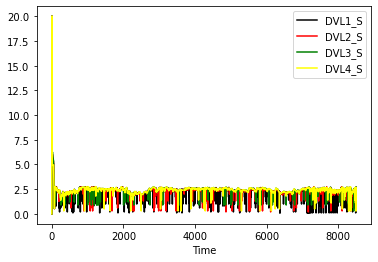

In [66]:
ax = plt.gca()
#Inputs
df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

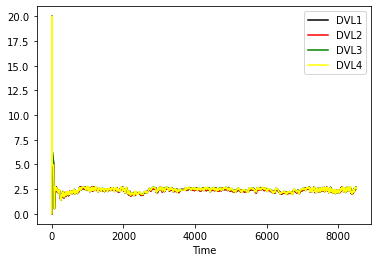

In [67]:
ax = plt.gca()
#Ground Trth
df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()

In [68]:
# Stacking the two arrays along axis 0 
out_lab1 = geek.stack((y1, y2, y3, y4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_lab1) 
print ("Labels Shape :\n ", out_lab1.shape) 

Output stacked array along axis 0:
  [[[ 0.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  ...
  [ 2.688453  2.688984  2.689416 ...  2.692583  2.692643  2.692682]
  [ 2.688984  2.689416  2.689849 ...  2.692643  2.692682  2.692715]
  [ 2.689416  2.689849  2.690236 ...  2.692682  2.692715  2.69274 ]]

 [[ 0.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  ...
  [ 2.598028  2.599904  2.601582 ...  2.626569  2.628101  2.629319]
  [ 2.599904  2.601582  2.603432 ...  2.628101  2.629319  2.630637]
  [ 2.601582  2.603432  2.605265 ...  2.629319  2.630637  2.631916]]

 [[ 0.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.   

In [69]:
y=out_lab1

In [70]:
y.shape

(4, 84971, 20)

In [71]:
y = y.transpose((0,2,1))

In [72]:
y.shape

(4, 20, 84971)

In [73]:
y = y.transpose((1,2,0))

In [74]:
y.shape

(20, 84971, 4)

In [75]:
y = y.transpose((2,1,0))


In [76]:
y.shape

(4, 84971, 20)

In [77]:
y = y.transpose((1,2,0))

In [78]:
y.shape

(84971, 20, 4)

In [79]:
# Stacking the two arrays along axis 0 
out_arr1 = geek.stack((X1, X2, X3,X4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_arr1) 
print ("Output Shape:\n ", out_arr1.shape) 

Output stacked array along axis 0:
  [[[ 0.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  ...
  [ 2.688453  2.688984  2.689416 ...  2.692583  2.692643  2.692682]
  [ 2.688984  2.689416  0.8      ...  2.692643  2.692682  2.692715]
  [ 2.689416  0.8       0.8      ...  2.692682  2.692715  2.69274 ]]

 [[ 0.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.      ]
  ...
  [ 2.598028  2.599904  2.601582 ...  1.8       1.8       1.8     ]
  [ 2.599904  2.601582  0.3      ...  1.8       1.8       1.8     ]
  [ 2.601582  0.3       0.3      ...  1.8       1.8       1.8     ]]

 [[ 0.       20.       20.       ... 20.       20.       20.      ]
  [20.       20.       20.       ... 20.       20.       20.   

In [80]:
X= out_arr1

In [81]:
X.shape

(4, 84971, 20)

In [82]:
X = X.transpose((1,2,0))

In [83]:
X.shape

(84971, 20, 4)

In [84]:
#Dividing the data in to the training, testing and validation sets
#Prepare the nice data set
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [86]:
X_train.shape

(50982, 20, 4)

In [87]:
X_val.shape

(16994, 20, 4)

In [88]:
X_test.shape

(16995, 20, 4)

In [89]:
y_train.shape

(50982, 20, 4)

In [90]:
y_test.shape

(16995, 20, 4)

In [91]:
y_val.shape

(16994, 20, 4)

In [92]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(X_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (50982, 20, 4)
y_train size: (50982, 20, 4)
X_val size: (16994, 20, 4)
y_val size: (16994, 20, 4)
X_test size: (16995, 20, 4)
y_test size: (16995, 20, 4)


In [93]:
n_features= 4

In [262]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
input_img=Input(shape=(n_steps, n_features))
#input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv1D(32, 3, activation='relu', padding='same')(input_img)
x = MaxPooling1D(2, padding='same')(x)

x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
#Encoding 1/8..
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x= Flatten()(x)
decoded = Dense(n_features*n_steps, activation='linear')(x)
outputs= Reshape((n_steps, n_features))(decoded)
#tf.reshape(tensor, shape, name=None)
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='mse',  metrics=['accuracy'])


In [ ]:
from keras.datasets import mnist
import numpy as np

#(x_train, _), (x_test, _) = mnist.load_data()

#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), n_steps, n_features))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), n_steps, n_features))  # adapt this if using `channels_first` image data format

In [ ]:
X_train.shape

In [183]:
from keras.callbacks import TensorBoard, EarlyStopping

es =EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=100,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
history=autoencoder.fit(X_train, y_train,
                epochs=10000,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val, y_val), 
                callbacks= [es], verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Early Stopping.. Can be a wise option to observe
#tf.keras.callbacks.EarlyStopping(
   # monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
  #  baseline=None, restore_best_weights=False
#)

Epoch 1/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 2/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 3/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 4/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 5/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 7/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 8/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 9/10000
399/399 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 10/10000
399/399 [==============================] - 2s 5ms/step - l

In [184]:
#Testing the data now for the prediction  of different values

In [185]:
TestingDataPrediction=autoencoder.predict(X_test)

In [186]:
#Testing data is used for the pridiction and here, I am thinking as a y= f(x_test), so, by using x_test one is prediciting
# the y_test kind of the thing


TestingDataPrediction=autoencoder.predict(X_test)

---



TestingDataPrediction.shape

In [187]:
y_predicition=TestingDataPrediction

In [188]:
TestingDataPrediction.shape

(16995, 20, 4)

In [189]:
y_test.shape

(16995, 20, 4)

In [190]:
# We need to have a factor, where we can perform even better or even can find some more ways to see
# how things are looking like


In [191]:
Prediction_to_data_we_have= TestingDataPrediction

In [192]:
Time= df2["Time"]

In [193]:
Time.shape

(84991,)

In [194]:
Training_Time= Time[:50982]

In [195]:
X_train.shape

(50982, 20, 4)

In [196]:
Training_Time

0           0.0
1           0.0
2           0.1
3           0.2
4           0.3
          ...  
50977    5097.6
50978    5097.7
50979    5097.8
50980    5097.9
50981    5098.0
Name: Time, Length: 50982, dtype: float64

In [197]:
Training_Time.shape

(50982,)

In [198]:
X_val

array([[[2.534764, 2.520817, 2.534764, 2.630348],
        [2.534675, 2.520969, 2.534675, 2.630244],
        [2.534585, 2.521118, 2.534585, 2.630139],
        ...,
        [2.533164, 2.522891, 2.533164, 2.62854 ],
        [2.533074, 2.52297 , 2.533074, 2.628444],
        [2.533004, 2.523029, 2.533004, 2.628369]],

       [[2.370703, 2.377518, 2.370703, 2.447118],
        [2.369702, 2.377212, 2.369702, 2.445436],
        [2.368823, 2.376899, 2.368823, 2.443929],
        ...,
        [2.359546, 2.369054, 2.359546, 2.424274],
        [2.359228, 2.368473, 2.359228, 2.423282],
        [2.358905, 2.367825, 2.358905, 2.422204]],

       [[2.623844, 2.619271, 2.623844, 2.55374 ],
        [2.623735, 2.619506, 2.623735, 2.553635],
        [2.623645, 2.619707, 2.623645, 2.553548],
        ...,
        [2.622495, 2.620853, 2.622495, 2.55239 ],
        [2.620999, 2.619433, 2.620999, 2.550769],
        [2.618709, 2.617205, 2.618709, 2.548273]],

       ...,

       [[2.337749, 2.34974 , 2.337749, 2.4

In [199]:

X_val.shape

(16994, 20, 4)

In [200]:
Vallidation_Time= Time[50982:67976]

In [201]:
Vallidation_Time

50982    5098.1
50983    5098.2
50984    5098.3
50985    5098.4
50986    5098.5
          ...  
67971    6797.0
67972    6797.1
67973    6797.2
67974    6797.3
67975    6797.4
Name: Time, Length: 16994, dtype: float64

In [202]:
Vallidation_Time.shape

(16994,)

In [203]:
Testing_Time= Time[-16995:]

In [204]:
Testing_Time.shape

(16995,)

In [205]:
X_test.shape

(16995, 20, 4)

In [206]:
Training_Time

0           0.0
1           0.0
2           0.1
3           0.2
4           0.3
          ...  
50977    5097.6
50978    5097.7
50979    5097.8
50980    5097.9
50981    5098.0
Name: Time, Length: 50982, dtype: float64

In [207]:
TestingDataPrediction.shape

(16995, 20, 4)

In [208]:
X_test.shape

(16995, 20, 4)

In [209]:
Testing_Time.shape

(16995,)

In [210]:
#Plotting all the data sets we have and then try to get more and more understanding of what I did, and what I wanted to
#get, so no more effort just tried to conclude some more and more better stuff

In [211]:
TestingDataPrediction.shape

(16995, 20, 4)

In [212]:
TestingDataPrediction

array([[[2.395382 , 2.3888688, 2.4764366, 2.4834628],
        [2.3827634, 2.3905437, 2.456099 , 2.462324 ],
        [2.3849044, 2.387063 , 2.460275 , 2.468736 ],
        ...,
        [2.3940036, 2.3875253, 2.4627504, 2.4768393],
        [2.3891864, 2.3806326, 2.4680622, 2.4670534],
        [2.3921201, 2.3742015, 2.4661813, 2.4685872]],

       [[2.6335692, 2.5815792, 2.57374  , 2.5632074],
        [2.619989 , 2.5698853, 2.5517576, 2.5442638],
        [2.6159606, 2.5698938, 2.5590737, 2.5467012],
        ...,
        [2.6262605, 2.574734 , 2.5628276, 2.5462792],
        [2.6189826, 2.5604913, 2.5669534, 2.5455434],
        [2.6235402, 2.5511382, 2.565199 , 2.5446067]],

       [[2.4529922, 2.4464896, 2.5365653, 2.5438693],
        [2.4409337, 2.4486756, 2.5167322, 2.5232506],
        [2.4426355, 2.446464 , 2.5202982, 2.5291874],
        ...,
        [2.4563262, 2.449106 , 2.524352 , 2.537872 ],
        [2.4516187, 2.4413126, 2.5301435, 2.5287642],
        [2.4546258, 2.4342668, 2.52777 

In [213]:
TestingDataPrediction.shape

(16995, 20, 4)

In [214]:
import numpy as np
x= np.array(TestingDataPrediction)

In [215]:
len(TestingDataPrediction)

16995

In [216]:
X = TestingDataPrediction.transpose((2,1,0))

In [217]:
X.shape

(4, 20, 16995)

In [218]:
X1= TestingDataPrediction.transpose(2,0,1)

In [219]:
X1.transpose(2,0,1).reshape(3,-1)

array([[2.395382 , 2.6335692, 2.4529922, ..., 2.3354657, 2.3445182,
        2.5526128],
       [2.3999517, 2.56096  , 2.4881783, ..., 2.6123137, 1.8826797,
        2.5087504],
       [2.3948457, 2.5613697, 2.3532414, ..., 2.253027 , 2.223002 ,
        2.694851 ]], dtype=float32)

In [220]:
X

array([[[2.395382 , 2.6335692, 2.4529922, ..., 2.33154  , 2.128742 ,
         2.5455775],
        [2.3827634, 2.619989 , 2.4409337, ..., 2.322562 , 2.1330137,
         2.5656908],
        [2.3849044, 2.6159606, 2.4426355, ..., 2.3182297, 2.1337981,
         2.5731468],
        ...,
        [2.3940036, 2.6262605, 2.4563262, ..., 2.3299673, 2.1505635,
         2.6051307],
        [2.3891864, 2.6189826, 2.4516187, ..., 2.325462 , 2.1454446,
         2.608115 ],
        [2.3921201, 2.6235402, 2.4546258, ..., 2.32935  , 2.149849 ,
         2.6165164]],

       [[2.3888688, 2.5815792, 2.4464896, ..., 2.3020654, 2.123224 ,
         2.579349 ],
        [2.3905437, 2.5698853, 2.4486756, ..., 2.2977226, 2.1312902,
         2.6065068],
        [2.387063 , 2.5698938, 2.446464 , ..., 2.2962828, 2.1280565,
         2.6107044],
        ...,
        [2.3875253, 2.574734 , 2.449106 , ..., 2.3055625, 2.132542 ,
         2.6171675],
        [2.3806326, 2.5604913, 2.4413126, ..., 2.2999063, 2.1300356,
   

In [221]:
TestingDataPrediction.shape

(16995, 20, 4)

In [222]:
TestingDataPrediction.shape

(16995, 20, 4)

In [223]:
Array_in_Numbers= TestingDataPrediction[0]

In [224]:
Array_in_Numbers

array([[2.395382 , 2.3888688, 2.4764366, 2.4834628],
       [2.3827634, 2.3905437, 2.456099 , 2.462324 ],
       [2.3849044, 2.387063 , 2.460275 , 2.468736 ],
       [2.3904846, 2.3880827, 2.4669862, 2.470706 ],
       [2.3891563, 2.388554 , 2.467026 , 2.4713893],
       [2.3855038, 2.390171 , 2.4651327, 2.471794 ],
       [2.3906703, 2.3873038, 2.4619455, 2.4669688],
       [2.3888042, 2.39177  , 2.4652007, 2.4709065],
       [2.3890362, 2.3920078, 2.4680223, 2.4706771],
       [2.391179 , 2.3868325, 2.4613352, 2.469645 ],
       [2.3848877, 2.389069 , 2.4649014, 2.4693162],
       [2.3897853, 2.3868132, 2.4675834, 2.4705482],
       [2.3893514, 2.3884356, 2.4595125, 2.4723954],
       [2.3880188, 2.387762 , 2.4614837, 2.47294  ],
       [2.3892725, 2.3876185, 2.4661589, 2.4727178],
       [2.3904018, 2.3856485, 2.4705582, 2.4747524],
       [2.394111 , 2.3925211, 2.4701848, 2.4695587],
       [2.3940036, 2.3875253, 2.4627504, 2.4768393],
       [2.3891864, 2.3806326, 2.4680622, 2.467

In [225]:
Array_in_Numbers_try= TestingDataPrediction[16994]

In [226]:
Array_in_Numbers_try

array([[2.5455775, 2.579349 , 2.635213 , 2.6354942],
       [2.5656908, 2.6065068, 2.640918 , 2.6458268],
       [2.5731468, 2.6107044, 2.640322 , 2.6549728],
       [2.5838468, 2.596471 , 2.6687224, 2.6478858],
       [2.595163 , 2.5949202, 2.6481302, 2.6512365],
       [2.5769906, 2.5897818, 2.6528444, 2.6521828],
       [2.5711448, 2.593159 , 2.6449373, 2.6615562],
       [2.584929 , 2.6092408, 2.6563282, 2.659254 ],
       [2.5743542, 2.6205716, 2.6666846, 2.662283 ],
       [2.5961864, 2.6214411, 2.713133 , 2.6710505],
       [2.5786269, 2.6237156, 2.696963 , 2.7254343],
       [2.5802014, 2.6233377, 2.6846757, 2.698942 ],
       [2.5853379, 2.6201813, 2.673254 , 2.6901007],
       [2.5747783, 2.6290762, 2.6666906, 2.6707945],
       [2.585267 , 2.6232498, 2.6782079, 2.6740544],
       [2.588989 , 2.6152601, 2.718355 , 2.6934404],
       [2.5986984, 2.617796 , 2.6854432, 2.7180948],
       [2.6051307, 2.6171675, 2.7002575, 2.7191465],
       [2.608115 , 2.5998688, 2.6958113, 2.705

In [227]:
#Creating function for the stacking the numpy 
#For loop for the numpy array
for i in range(16994):
  print(TestingDataPrediction[i])
  Prediction_DVL_Data =np.concatenate((TestingDataPrediction[0], TestingDataPrediction[i]), axis=0)

Streaming output truncated to the last 5000 lines.
 [2.563208  2.511241  2.4876597 2.480867 ]
 [2.558648  2.5126193 2.4973958 2.48324  ]
 [2.5706248 2.5160055 2.5054367 2.4914386]
 [2.5692294 2.5173502 2.5026135 2.4897304]
 [2.5675764 2.5195012 2.5035448 2.492037 ]
 [2.569944  2.5217805 2.4999626 2.4876838]
 [2.5677004 2.5243828 2.5029876 2.4905283]
 [2.568288  2.5268712 2.5080352 2.4964318]
 [2.568975  2.526999  2.5089085 2.495793 ]
 [2.5601418 2.52859   2.5091488 2.4979126]
 [2.566182  2.5270777 2.510386  2.4962478]
 [2.567554  2.5299015 2.5070379 2.5034106]
 [2.5658104 2.5279696 2.510828  2.5065477]
 [2.5715513 2.5268292 2.5143688 2.5051532]
 [2.571791  2.5257726 2.527271  2.5068464]
 [2.5789638 2.531223  2.5108278 2.5043573]
 [2.5772834 2.5302749 2.5173306 2.4977624]
 [2.570795  2.5182583 2.5222876 2.5016396]
 [2.5769706 2.5094419 2.5193129 2.5015213]]
[[2.6813736 2.658685  2.6448784 2.5962691]
 [2.6496766 2.648308  2.6012082 2.5644698]
 [2.6503947 2.6450262 2.6091053 2.5697103]
 [

In [228]:
Prediction_DVL_Data

array([[2.395382 , 2.3888688, 2.4764366, 2.4834628],
       [2.3827634, 2.3905437, 2.456099 , 2.462324 ],
       [2.3849044, 2.387063 , 2.460275 , 2.468736 ],
       [2.3904846, 2.3880827, 2.4669862, 2.470706 ],
       [2.3891563, 2.388554 , 2.467026 , 2.4713893],
       [2.3855038, 2.390171 , 2.4651327, 2.471794 ],
       [2.3906703, 2.3873038, 2.4619455, 2.4669688],
       [2.3888042, 2.39177  , 2.4652007, 2.4709065],
       [2.3890362, 2.3920078, 2.4680223, 2.4706771],
       [2.391179 , 2.3868325, 2.4613352, 2.469645 ],
       [2.3848877, 2.389069 , 2.4649014, 2.4693162],
       [2.3897853, 2.3868132, 2.4675834, 2.4705482],
       [2.3893514, 2.3884356, 2.4595125, 2.4723954],
       [2.3880188, 2.387762 , 2.4614837, 2.47294  ],
       [2.3892725, 2.3876185, 2.4661589, 2.4727178],
       [2.3904018, 2.3856485, 2.4705582, 2.4747524],
       [2.394111 , 2.3925211, 2.4701848, 2.4695587],
       [2.3940036, 2.3875253, 2.4627504, 2.4768393],
       [2.3891864, 2.3806326, 2.4680622, 2.467

In [229]:
print("x3 ndim: ", Prediction_DVL_Data.ndim)
print("x3 shape:", Prediction_DVL_Data.shape)
print("x3 size: ", Prediction_DVL_Data.size)

x3 ndim:  2
x3 shape: (40, 4)
x3 size:  160


In [230]:
Comb_Check= np.concatenate((TestingDataPrediction[0],TestingDataPrediction[1],TestingDataPrediction[2], TestingDataPrediction[3], TestingDataPrediction[4],
                            TestingDataPrediction[5],TestingDataPrediction[6],TestingDataPrediction[7],), axis=0)

In [231]:
Comb_Check.shape

(160, 4)

In [232]:
Beam_0_try= Comb_Check[:,0]

In [233]:
Beam_0_try.shape

(160,)

In [234]:
Beam_0_try


array([2.395382 , 2.3827634, 2.3849044, 2.3904846, 2.3891563, 2.3855038,
       2.3906703, 2.3888042, 2.3890362, 2.391179 , 2.3848877, 2.3897853,
       2.3893514, 2.3880188, 2.3892725, 2.3904018, 2.394111 , 2.3940036,
       2.3891864, 2.3921201, 2.6335692, 2.619989 , 2.6159606, 2.6269085,
       2.6235943, 2.622013 , 2.6252987, 2.621355 , 2.620962 , 2.6217475,
       2.6123898, 2.6177065, 2.6184583, 2.6170645, 2.6215785, 2.621149 ,
       2.6274393, 2.6262605, 2.6189826, 2.6235402, 2.4529922, 2.4409337,
       2.4426355, 2.4489577, 2.4483843, 2.44465  , 2.4492233, 2.4469779,
       2.448492 , 2.4500964, 2.444126 , 2.4490843, 2.4489217, 2.447761 ,
       2.449757 , 2.4513776, 2.455925 , 2.4563262, 2.4516187, 2.4546258,
       2.409271 , 2.3950531, 2.3990116, 2.403152 , 2.402719 , 2.398635 ,
       2.4043725, 2.402475 , 2.403251 , 2.405575 , 2.4003959, 2.4052627,
       2.4046206, 2.4033892, 2.4040818, 2.4062588, 2.4096744, 2.410393 ,
       2.4063594, 2.40887  , 2.4212954, 2.413834 , 

In [235]:
Testing_Time

67996    6799.5
67997    6799.6
67998    6799.7
67999    6799.8
68000    6799.9
          ...  
84986    8498.5
84987    8498.6
84988    8498.7
84989    8498.8
84990    8498.9
Name: Time, Length: 16995, dtype: float64

In [236]:
Mini_Testing_time= Testing_Time[:160]

In [237]:
import numpy as np

In [238]:
Mini_Testing_time

67996    6799.5
67997    6799.6
67998    6799.7
67999    6799.8
68000    6799.9
          ...  
68151    6815.0
68152    6815.1
68153    6815.2
68154    6815.3
68155    6815.4
Name: Time, Length: 160, dtype: float64

In [239]:
y1.shape

(84971, 20)

In [240]:
try_label= y1[-16995:]

In [241]:
try_label.shape

(16995, 20)

In [242]:
try_label

array([[2.247594, 2.247102, 2.246568, ..., 2.240006, 2.239608, 2.239216],
       [2.247102, 2.246568, 2.246088, ..., 2.239608, 2.239216, 2.238828],
       [2.246568, 2.246088, 2.245614, ..., 2.239216, 2.238828, 2.238444],
       ...,
       [2.688453, 2.688984, 2.689416, ..., 2.692583, 2.692643, 2.692682],
       [2.688984, 2.689416, 2.689849, ..., 2.692643, 2.692682, 2.692715],
       [2.689416, 2.689849, 2.690236, ..., 2.692682, 2.692715, 2.69274 ]])

In [243]:
result = try_label.flatten() 

In [244]:
Label_Data_Beam_1

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [245]:
Label_Data_Beam_1.shape

(84991,)

In [246]:
label_try_try= Label_Data_Beam_1[-16995:]

In [247]:
label_try_try

array([2.238828, 2.238444, 2.238027, ..., 2.692715, 2.69274 , 2.692755])

In [248]:
label_try_try=label_try_try[:160]

In [249]:
label_try_try

array([2.238828, 2.238444, 2.238027, 2.23769 , 2.23732 , 2.236917,
       2.236591, 2.236197, 2.235879, 2.235494, 2.235182, 2.23484 ,
       2.234502, 2.234167, 2.233804, 2.233511, 2.233189, 2.23284 ,
       2.232558, 2.232249, 2.231944, 2.231643, 2.231317, 2.231027,
       2.230767, 2.230483, 2.230204, 2.229929, 2.229659, 2.229392,
       2.22913 , 2.228871, 2.228617, 2.228366, 2.228095, 2.227852,
       2.227636, 2.2274  , 2.227144, 2.226938, 2.226712, 2.226489,
       2.226247, 2.226052, 2.225817, 2.225606, 2.225399, 2.225194,
       2.224992, 2.224793, 2.224597, 2.224404, 2.224214, 2.224027,
       2.223843, 2.223679, 2.223501, 2.223308, 2.223135, 2.222983,
       2.222816, 2.222636, 2.222475, 2.222333, 2.22216 , 2.222006,
       2.221867, 2.2217  , 2.221564, 2.221414, 2.221264, 2.221115,
       2.220952, 2.220804, 2.22067 , 2.220522, 2.220375, 2.220227,
       2.220079, 2.219931, 2.219784, 2.219636, 2.219488, 2.219341,
       2.219193, 2.219032, 2.218885, 2.218753, 2.218607, 2.218

In [250]:
label_try_try.shape

(160,)

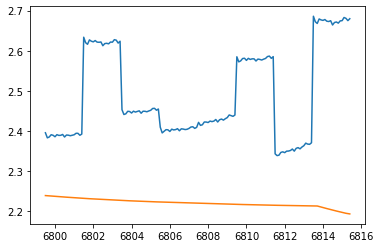

In [251]:
#plotting of the mini testing time and the small chunk to get more and more better results
ax = plt.gca()
#Inputs
plt.plot(Mini_Testing_time, Beam_0_try)
plt.plot(Mini_Testing_time,label_try_try)

plt.show()

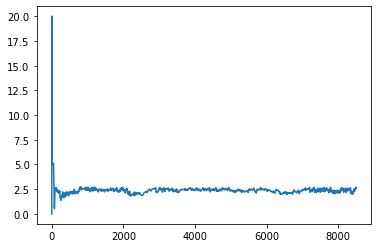

In [252]:
#plotting of the mini testing time and the small chunk to get more and more better results
ax = plt.gca()
#Inputs

plt.plot(Time,Label_Data_Beam_1)

plt.show()

dict_keys(['loss', 'val_loss'])


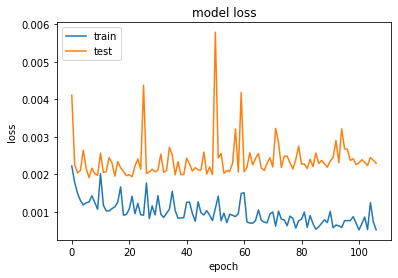

In [261]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [258]:
from matplotlib import pyplot

In [259]:

	# plot learning curves
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
#pyplot.title('lrate='+str(lrate), pad=-50)max_value = np.max(Beam_0_try)


KeyError: ignored

In [ ]:
max_value

In [ ]:
max_value = np.max(TestingDataPrediction)

In [ ]:
panchod=TestingDataPrediction[:,0]

In [ ]:
panchod.shape

In [ ]:
max_value = np.max(panchod)

In [ ]:
max_value

In [ ]:
#axis combining of the numpy array to get more and more better visualization of the data
for TestingDataPrediction[i] in range(16994):
    Comb= np.concatenate (TestingDataPrediction[i], )
    print("We're on time %d" % (x))

In [ ]:
Comb_Check_all= np.concatenate((TestingDataPrediction[]))

In [ ]:
Comb_Check

In [ ]:
aA= TestingDataPrediction[:,:0,:1]

In [ ]:
aA.shape

In [ ]:
aA


In [ ]:
np.squeeze(x).shape

In [ ]:
np.squeeze(x, axis=0).shape

In [ ]:
TestingDataPrediction.shape

In [ ]:
x_input = TestingDataPrediction.reshape((16995, n_steps, n_features))

In [ ]:
x_input.shape

In [ ]:
x_input_1= x_input.reshape((16995, n_features))

In [ ]:

#Prediction 
# demonstrate prediction
import math

In [ ]:

plt.figure(figsize = (18,9))

plt.plot(Testing_Time, TestingDataPrediction, label="Testing Prediction")
plt.plot(Testing_Time, X_test, Label= "Testing Data")
#plt.plot(test_date,y_pred,label="Forecasting")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [ ]:
TestingDataPrediction

In [ ]:
TestingDataPrediction.shape

In [ ]:
print(type(TestingDataPrediction))

In [ ]:
DVL1_Predicition= TestingDataPrediction

In [ ]:
X_train.shape

In [ ]:
b = np.reshape(TestingDataPrediction, (np.product(TestingDataPrediction.shape)))

In [ ]:
b.shape

In [ ]:
#Check the sliding window
#After Checking it, allow the mind to find a way to scratch it even better

In [ ]:
TestingDataPrediction.shape